# Palmer Penguins Modeling

Import the Palmer Penguins dataset and print out the first few rows.

Suppose we want to predict `bill_depth_mm` using the other variables in the dataset.

**Dummify** all variables that require this.

In [116]:
pip install palmerpenguins

In [117]:
import pandas as pd
import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import make_pipeline
from sklearn.pipeline import make_pipeline
from sklearn.neighbors import KNeighborsRegressor
from sklearn.compose import make_column_selector, ColumnTransformer
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder, PolynomialFeatures



In [118]:
from palmerpenguins import load_penguins
import pandas as pd


penguins = load_penguins()
penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007


In [119]:
penguins = penguins.dropna()
penguins_dummified = pd.get_dummies(penguins, columns=['species', 'island', 'sex', 'year'])
penguins_dummified.head()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,species_Adelie,species_Chinstrap,species_Gentoo,island_Biscoe,island_Dream,island_Torgersen,sex_female,sex_male,year_2007,year_2008,year_2009
0,39.1,18.7,181.0,3750.0,True,False,False,False,False,True,False,True,True,False,False
1,39.5,17.4,186.0,3800.0,True,False,False,False,False,True,True,False,True,False,False
2,40.3,18.0,195.0,3250.0,True,False,False,False,False,True,True,False,True,False,False
4,36.7,19.3,193.0,3450.0,True,False,False,False,False,True,True,False,True,False,False
5,39.3,20.6,190.0,3650.0,True,False,False,False,False,True,False,True,True,False,False


Let's use the other variables to predict `bill_depth_mm`. Prepare your data and fit the following models on the entire dataset:

* Your best multiple linear regression model from before
* Two kNN models (for different values of K)
* A decision tree model

Create a plot like the right plot of Fig 1. in our `Model Validation` chapter with the training and test error plotted for each of your four models.

Which of your models was best?

# Linear regression

In [120]:
X = penguins_dummified.drop(columns=['bill_depth_mm'])
y = penguins_dummified['bill_depth_mm']

In [121]:
from sklearn.linear_model import LinearRegression

linear = LinearRegression()
linear.fit(X, y)


LinearRegression()

In [122]:
y_pred_linear = linear.predict(X)

In [123]:
mse = mean_squared_error(y, y_pred_linear)
mse

0.5927881977783395

# Decision Tree

In [124]:
dt = DecisionTreeRegressor()

dt

DecisionTreeRegressor()

In [125]:
dt.fit(X, y)

DecisionTreeRegressor()

[Text(0.5639697529969064, 0.9772727272727273, 'x[5] <= 0.5\nsquared_error = 3.866\nsamples = 333\nvalue = 17.165'),
 Text(0.2828360643851508, 0.9318181818181818, 'x[9] <= 0.5\nsquared_error = 1.412\nsamples = 214\nvalue = 18.371'),
 Text(0.4234029086910286, 0.9545454545454546, 'True  '),
 Text(0.16224985498839908, 0.8863636363636364, 'x[1] <= 193.5\nsquared_error = 0.884\nsamples = 107\nvalue = 19.13'),
 Text(0.12485498839907193, 0.8409090909090909, 'x[8] <= 0.5\nsquared_error = 0.884\nsamples = 45\nvalue = 18.822'),
 Text(0.09039056457849962, 0.7954545454545454, 'x[2] <= 4125.0\nsquared_error = 0.777\nsamples = 38\nvalue = 18.703'),
 Text(0.05394431554524362, 0.75, 'x[0] <= 40.55\nsquared_error = 0.589\nsamples = 29\nvalue = 18.545'),
 Text(0.026295436968290797, 0.7045454545454546, 'x[1] <= 187.0\nsquared_error = 0.633\nsamples = 12\nvalue = 18.783'),
 Text(0.015467904098994586, 0.6590909090909091, 'x[0] <= 38.9\nsquared_error = 0.328\nsamples = 7\nvalue = 18.371'),
 Text(0.0092807424

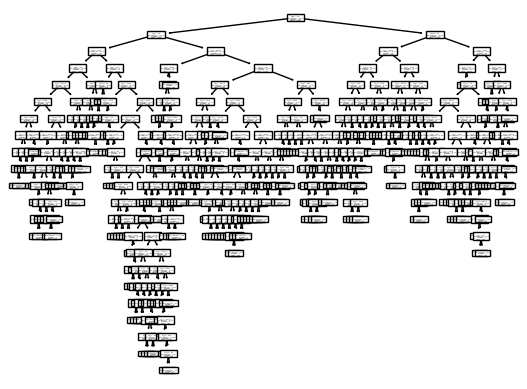

In [126]:
from sklearn.tree import plot_tree

plot_tree(dt)

In [127]:
alphas = {'max_depth': np.array([1, 2, 3, 4, 5, 6, 7, 8])}

gscv = GridSearchCV(dt, param_grid=alphas, cv = 5, scoring='neg_mean_squared_error')
gscv_fitted = gscv.fit(X, y)

df_cv_results_ = pd.DataFrame(gscv_fitted.cv_results_)

df_cv_results_

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.005284,0.001364,0.003752,0.000884,1,{'max_depth': 1},-1.619236,-1.399174,-1.230920,-1.086099,-1.290434,-1.325173,0.178435,5
1,0.004503,0.000290,0.003257,0.000275,2,{'max_depth': 2},-1.066596,-0.835874,-0.743041,-0.546712,-0.607435,-0.759931,0.183746,1
2,0.004619,0.000387,0.003080,0.000233,3,{'max_depth': 3},-1.115396,-1.014808,-0.654097,-0.575124,-0.661944,-0.804274,0.217459,2
3,0.004926,0.000329,0.003374,0.000244,4,{'max_depth': 4},-1.235406,-1.169278,-0.728462,-0.407406,-1.392669,-0.986644,0.363942,3
4,0.004875,0.000085,0.003348,0.000412,5,{'max_depth': 5},-1.375817,-1.653343,-0.706056,-0.448129,-1.054391,-1.047547,0.436054,4
5,0.004974,0.000137,0.003001,0.000035,6,{'max_depth': 6},-1.775978,-2.272652,-0.910632,-0.462984,-1.394444,-1.363338,0.634613,6
6,0.005396,0.000236,0.003647,0.000507,7,{'max_depth': 7},-1.909011,-2.082247,-0.861669,-0.460486,-1.582725,-1.379228,0.621011,7
7,0.006119,0.000364,0.003865,0.000836,8,{'max_depth': 8},-1.948949,-2.237363,-0.802678,-0.443929,-1.746344,-1.435853,0.690929,8


In [128]:
dt = DecisionTreeRegressor(max_depth=2)

In [129]:
dt.fit(X, y)

DecisionTreeRegressor(max_depth=2)

[Text(0.5, 0.8333333333333334, 'x[5] <= 0.5\nsquared_error = 3.866\nsamples = 333\nvalue = 17.165'),
 Text(0.25, 0.5, 'x[9] <= 0.5\nsquared_error = 1.412\nsamples = 214\nvalue = 18.371'),
 Text(0.375, 0.6666666666666667, 'True  '),
 Text(0.125, 0.16666666666666666, 'squared_error = 0.884\nsamples = 107\nvalue = 19.13'),
 Text(0.375, 0.16666666666666666, 'squared_error = 0.787\nsamples = 107\nvalue = 17.611'),
 Text(0.75, 0.5, 'x[10] <= 0.5\nsquared_error = 0.964\nsamples = 119\nvalue = 14.997'),
 Text(0.625, 0.6666666666666667, '  False'),
 Text(0.625, 0.16666666666666666, 'squared_error = 0.287\nsamples = 58\nvalue = 14.238'),
 Text(0.875, 0.16666666666666666, 'squared_error = 0.54\nsamples = 61\nvalue = 15.718')]

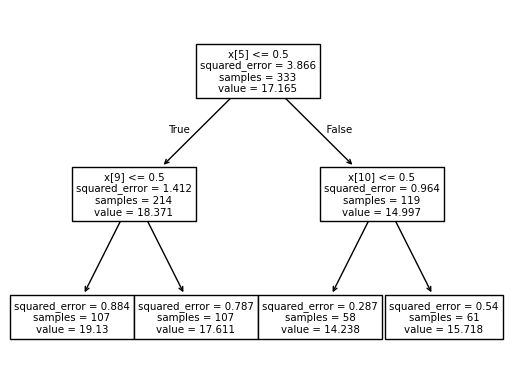

In [130]:
plot_tree(dt)

In [131]:
y_pred_tree = dt.predict(X)


# Knn

In [132]:
from sklearn.pipeline import make_pipeline

pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('knn', KNeighborsRegressor(n_neighbors=5))
])


pipeline.fit(X, y)
y_pred = pipeline.predict(X)

In [133]:
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(y, y_pred)
mse

0.435821021021021

In [134]:
from sklearn.pipeline import make_pipeline

pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('knn', KNeighborsRegressor(n_neighbors=3))
])


pipeline.fit(X, y)
y_pred_knn3 = pipeline.predict(X)

In [135]:
mse = mean_squared_error(y, y_pred)
mse

0.435821021021021

In [136]:
param_grid = {
    'knn__n_neighbors': range(1, 20)
}

gscv = GridSearchCV(pipeline, param_grid=param_grid, cv = 5, scoring='neg_mean_squared_error')
gscv_fitted = gscv.fit(X, y)

df_cv_results_ = pd.DataFrame(gscv_fitted.cv_results_)

df_cv_results_

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_knn__n_neighbors,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.008789,0.001740,0.005908,0.000635,1,{'knn__n_neighbors': 1},-1.910597,-2.149104,-0.761493,-0.512576,-0.676364,-1.202027,0.684801,19
1,0.008301,0.000829,0.005924,0.000487,2,{'knn__n_neighbors': 2},-1.658246,-1.668881,-0.670970,-0.471250,-1.369697,-1.167809,0.502872,18
2,0.009183,0.000678,0.006442,0.000472,3,{'knn__n_neighbors': 3},-1.610149,-1.465804,-0.605108,-0.395673,-1.214512,-1.058249,0.477380,15
3,0.008602,0.000775,0.006552,0.000584,4,{'knn__n_neighbors': 4},-1.528069,-1.299552,-0.563274,-0.432206,-1.081146,-0.980850,0.421060,10
4,0.008257,0.000915,0.006498,0.000854,5,{'knn__n_neighbors': 5},-1.474293,-1.364436,-0.527337,-0.445242,-0.971424,-0.956546,0.419597,6
5,0.008334,0.001119,0.005834,0.000519,6,{'knn__n_neighbors': 6},-1.489295,-1.383346,-0.535817,-0.465888,-1.007050,-0.976279,0.420557,9
6,0.007640,0.000215,0.005672,0.000223,7,{'knn__n_neighbors': 7},-1.423737,-1.402455,-0.528346,-0.472359,-0.950241,-0.955428,0.408639,5
7,0.008370,0.001035,0.006051,0.000555,8,{'knn__n_neighbors': 8},-1.436665,-1.388752,-0.502833,-0.506707,-0.967202,-0.960432,0.406341,7
8,0.008264,0.000783,0.006460,0.000437,9,{'knn__n_neighbors': 9},-1.504684,-1.335088,-0.493387,-0.517927,-0.923924,-0.955002,0.412724,4
9,0.008299,0.000799,0.007159,0.001210,10,{'knn__n_neighbors': 10},-1.514622,-1.235346,-0.512972,-0.506944,-0.967579,-0.947493,0.396936,3


In [137]:
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('knn', KNeighborsRegressor(n_neighbors=12))
])

pipeline.fit(X, y)
y_pred_knn_best = pipeline.predict(X)

In [138]:
mse = mean_squared_error(y, y_pred)
mse

0.435821021021021

In [139]:
from plotnine import *

In [140]:
plot_df = pd.DataFrame({
    'actual': y,
    'Linear': y_pred_linear,
    'Decision Tree': y_pred_tree,
    'KNN_best': y_pred_knn_best,
    'KNN_3': y_pred_knn3
})

plot_long = plot_df.melt(
    id_vars='actual',
    var_name='Model',
    value_name='Predicted'
)

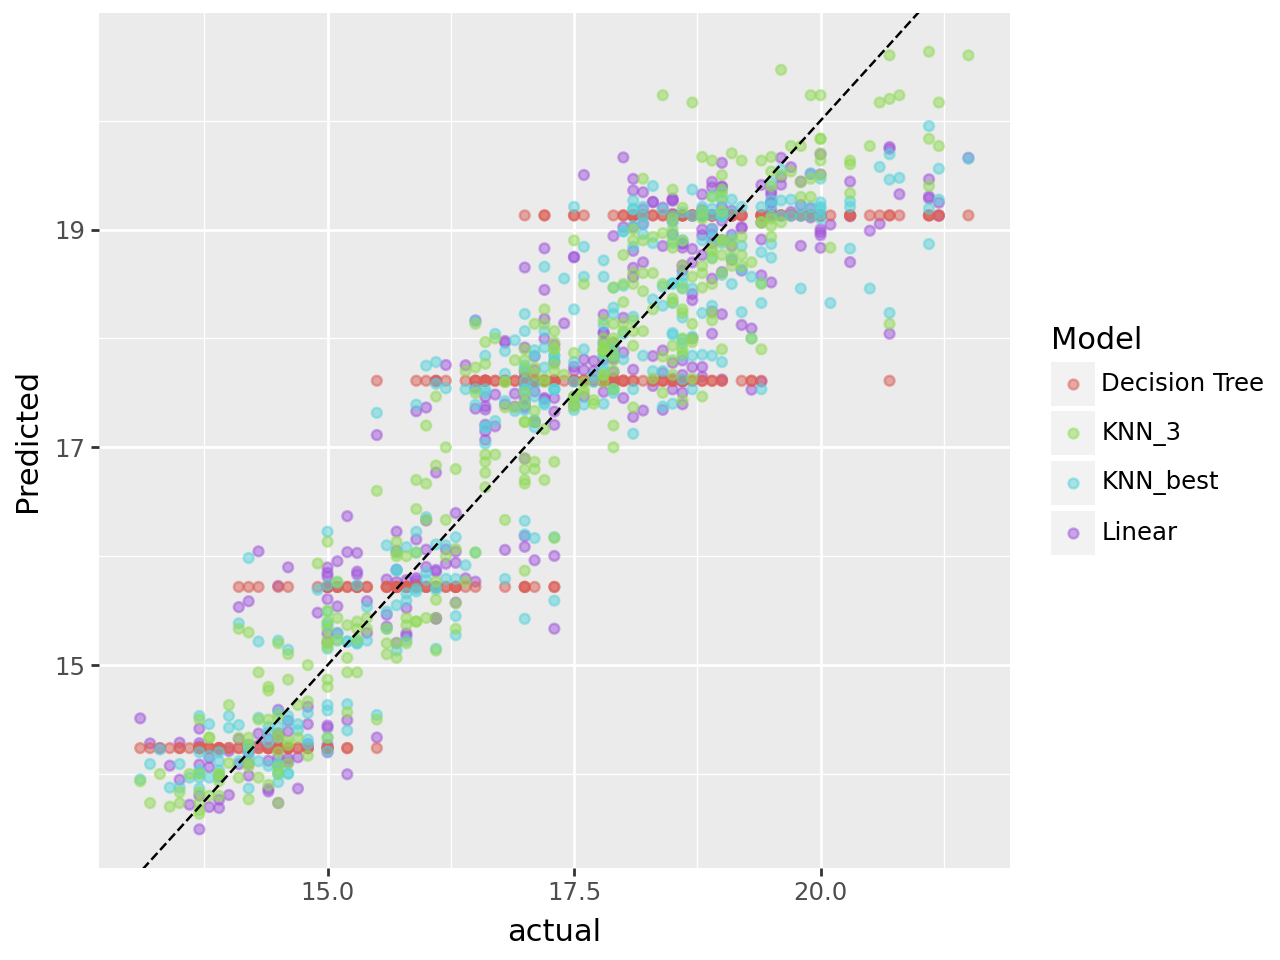

In [141]:
(ggplot(plot_long, aes(x='actual', y='Predicted', color='Model'))
    + geom_point(alpha=0.5)
    + geom_abline(slope=1, intercept=0, linetype='dashed')
)

from this plot we can see that the decision tree model is the worst as it can really only predict 4 values with a depth of 2. The other models were about the same.